# Digital filter design

Following document is a part of articler on Medium and describes how to design a lowpass filter with a cutoff frequency $\omega_{0}$ and Notch filter.

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import math
import control
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Generate a test signal

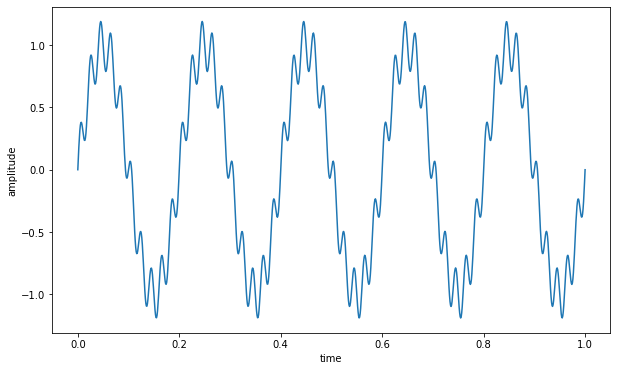

In [2]:
# Generate a signal
samplingFreq = 1000;    
 
A1 = 1
A2 = 0.2
f1 = 5
f2 = 50
t = np.linspace(0,1,1000)
y = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t)

# Compute Fourier transform
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure(figsize=(10,6))

plt.plot(t,y)
plt.ylabel("amplitude")
plt.xlabel("time")
plt.show()



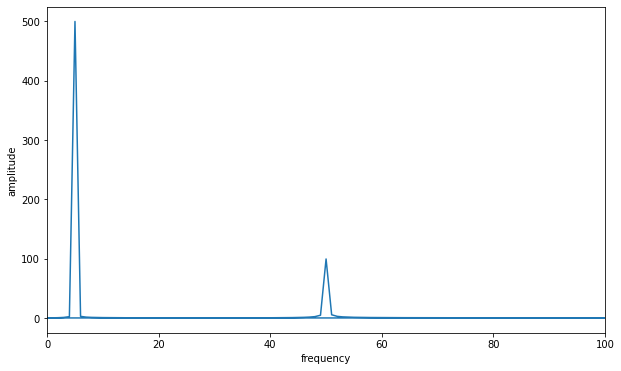

In [3]:
# Signal spectrum
plt.figure(figsize=(10,6))
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([0,100])
plt.ylabel("amplitude");
plt.xlabel("frequency");
plt.show()


## 2. Transfer function of Low pass filter

$$\large H(s) = \frac{\omega_0}{s + \omega_0}$$



In [4]:
# Low-pass filter
w0 = 2*np.pi*5
num = w0        
den = [1,w0]     
sys_L = control.tf(num, den)
sys_L


TransferFunction(array([31.41592654]), array([ 1.        , 31.41592654]))

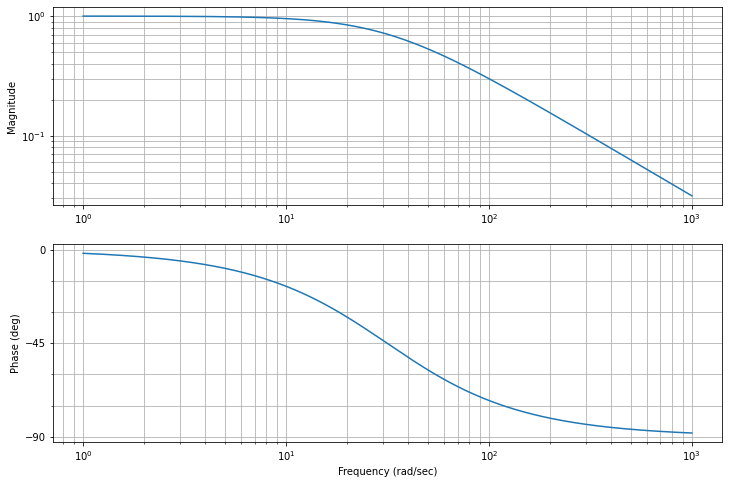

In [5]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_L, Hz=False)

## 3. Discrete transfer function

* Low pass filter transfer function:

$$ \large H(s) = \frac{\omega_{0}}{s +\omega_{0}} $$

* The time step is:
$$\large\Delta t = 1/f_s$$ 
* fs - sampling frequency

* Using Tustin's method we set for s:
$$ \large s = \frac{2}{\Delta t} \left( \frac{1-z^{-1}}{1+z^{-1}} \right)$$

finaly,

$$\large H[z] = \frac{\Delta t \omega_0 (z+1)}{(\Delta t \omega_0 + 2)z + \Delta t \omega_0 - 2} $$

In [6]:
#we use scipy package now (to compute coefficients)
dt = 1.0/samplingFreq;
lowPass = signal.TransferFunction(num,den)
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
discreteLowPass
#print(type(discreteLowPass))
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("b :", b)
print("a: ", a[1:])

b : [0.01546504 0.01546504]
a:  [0.96906992]


## 4. Digital filter coefficients


ARMA filter is descibed by transfer function as follows,
$$\large H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 - a_1 z^{-1} - a_2 z^{-2}}$$

Output from filter can be rewritten as follows,
$$\large y[n] = a_1 y[n-1] + a_2 y[n-2] + b_0 x[n] + b_1 x[n-1] + b_2 x[n-2]$$
(This is a result of taking the Z-transform which is not shown here)

We need to compare ARMA trasnfer function with coefficinets calulated in previous step.

$$\large [b_0, b_1, b_2]$$

$$\large  [1, a_1, a_2]$$



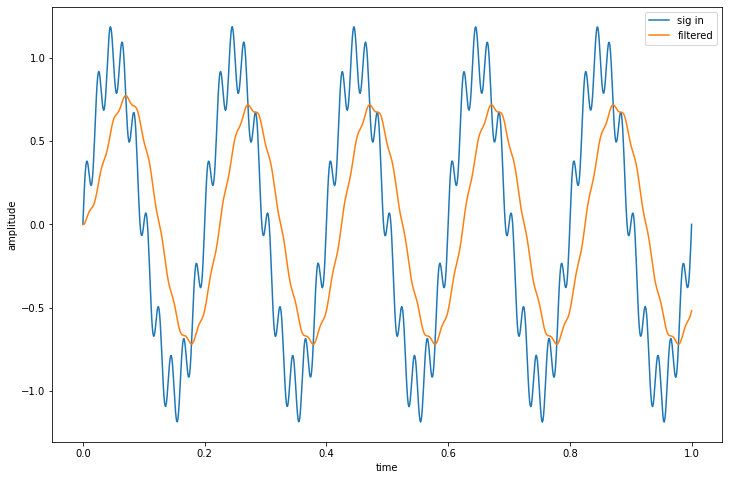

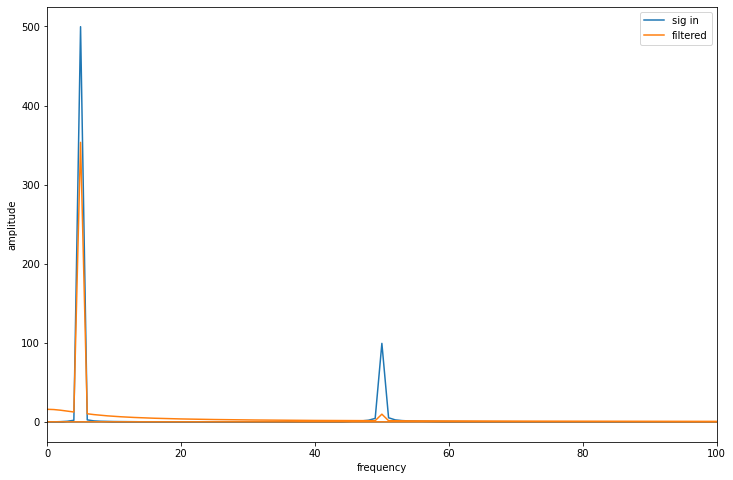

In [7]:


# Filter the signal
yfilter = np.zeros(len(y))
for i in range(3,len(y)):
    yfilter[i] = a[1]*yfilter[i-1] + b[0]*y[i] + b[1]*y[i-1]
    

plt.figure(figsize=(12,8))
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(t,yfilter)
plt.legend(['sig in', 'filtered'])


# Generate Fourier transform
X = np.fft.fft(yfilter)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure(figsize=(12,8))
plt.plot(fcycles,np.absolute(yhat))
plt.plot(fcycles,np.absolute(X))
plt.xlim([0,100])
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.legend(['sig in', 'filtered'])


## NOTCH AS A  PASSBAND

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
import control

Text(0, 0.5, 'amplitude')

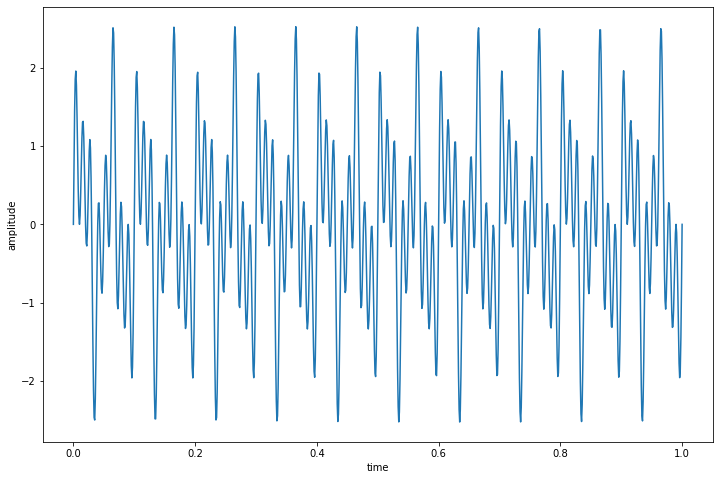

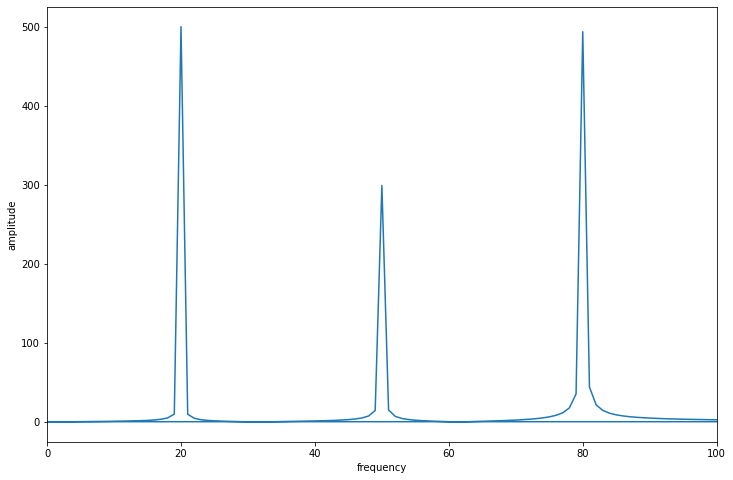

In [9]:
# Generate a signal
samplingFreq = 1000

A1 = 1
A2 = 0.6
A3 = 1
f1 = 20
f2 = 50
f3 = 80
t = np.linspace(0,1,1000)
y = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t)


# Fourier transform
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

# Plot the signal
plt.figure(figsize=(12,8))
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("amplitude")

# Plot the power spectrum
plt.figure(figsize=(12,8))
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([0,100])
plt.xlabel("frequency")
plt.ylabel("amplitude")

In [10]:

wn =50* 2*np.pi
zeta = 0.05
a = 2 # pole a time lower and higher than natural frequency
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(den, num)

num_pole_above = [a*wn]
den_pole_above = [1, a*wn]
pole_above = control.tf(num_pole_above, den_pole_above)

num_pole_below = [wn/a]
den_pole_below = [1, wn/a]
pole_below = control.tf(num_pole_below, den_pole_below)

sys_notch = sys * pole_above * pole_below 


print(sys_notch)


9.87e+04 s^2 + 3.101e+06 s + 9.741e+09
--------------------------------------
9.87e+04 s^2 + 7.752e+07 s + 9.741e+09



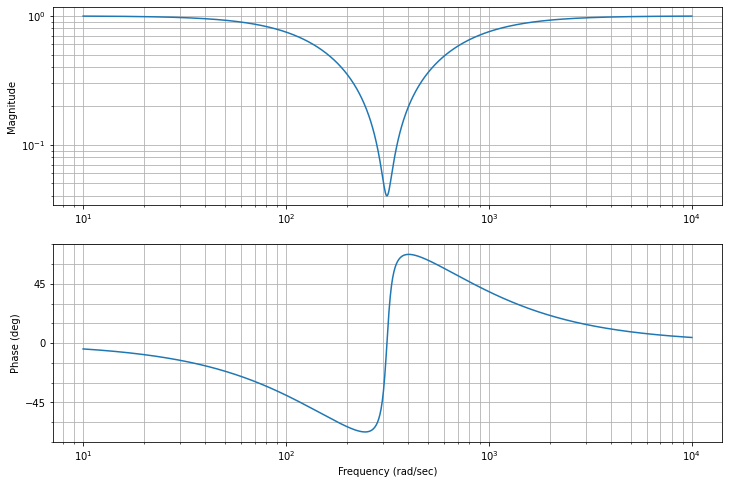

In [11]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_notch, Hz=False)

In [12]:
dt = 1.0/samplingFreq;
numNotch = [9.87e+04, 3.101e+06, 9.741e+09]
denNotch = [9.87e+04, 7.752e+07, 9.741e+09]
sysNotch = signal.TransferFunction(numNotch, denNotch)

#print(sysNotch)

In [13]:
dt = 1.0/samplingFreq;
discreteNotch = sysNotch.to_discrete(dt,method='gbt',alpha=0.5)
#print(discreteNotch)
b = discreteNotch.num;
a = -discreteNotch.den;
print("b :", b)
print("a: ", a[1:])

b : [ 0.73401885 -1.37624044  0.71185226]
a:  [ 1.37624044 -0.44587111]


In [14]:
notchFilter = signal.TransferFunction(numNotch, denNotch)
b = discreteNotch.num;
a = -discreteNotch.den;
print("b :", b)
print("a: ", a[1:])


b : [ 0.73401885 -1.37624044  0.71185226]
a:  [ 1.37624044 -0.44587111]


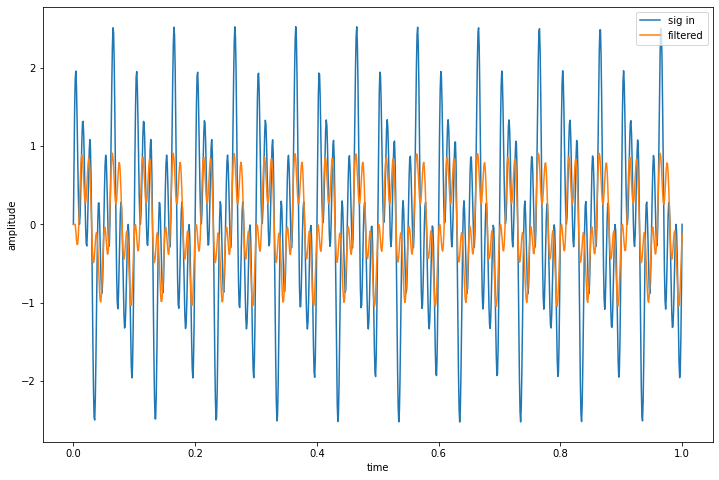

In [15]:
# Filter the signal
yfilt = np.zeros(len(y));
for i in range(4,len(y)):
    yfilt[i] = a[1]*yfilt[i-1] + a[2]*yfilt[i-2] + b[0]*y[i] + b[1]*y[i-1] + b[2]*y[i-2];
    #yfilt[i] = a[1]*yfilt[i-1] + b[0]*y[i] + b[1]*y[i-1];
    
# Plot the signal
plt.figure(figsize=(12,8))
plt.plot(t,y)
plt.plot(t,yfilt)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(['sig in', 'filtered'])


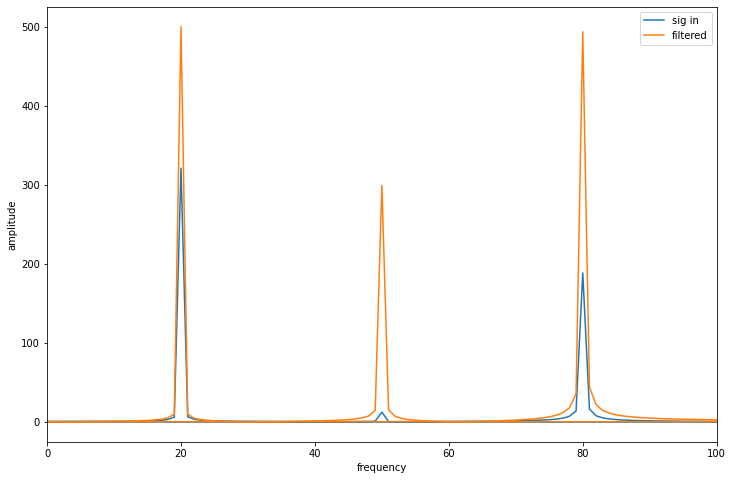

In [16]:
# Fourier transform
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure(figsize=(12,8))

plt.plot(fcycles,np.absolute(yfilthat))
plt.xlim([0,100]);

plt.plot(fcycles,np.absolute(yhat))
plt.xlim([0,100]);
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.legend(['sig in', 'filtered'])

In [17]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fftpack import fft
import control

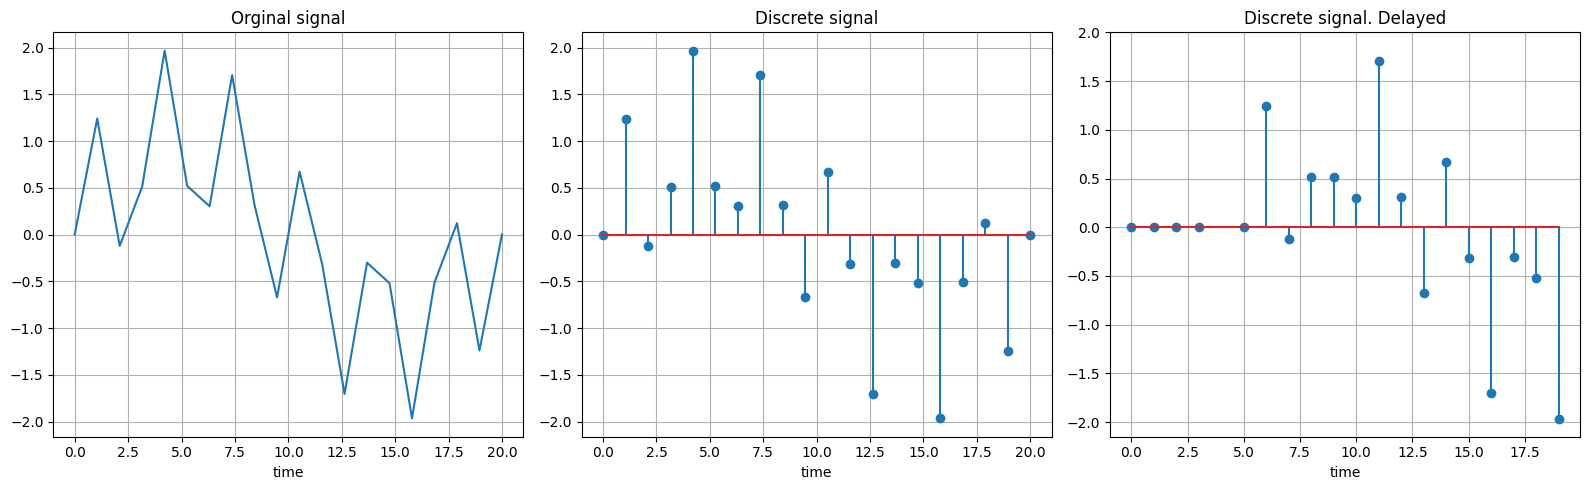

In [18]:
n = 20 

t = np.linspace(0, 20, n, endpoint=True)
# sine wave
x = np.sin(2* np.pi*t) + np.sin(50*np.pi*t)# + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

def plot_selector(s, t, x):
    if s == 0:
        return plt.plot(t, x)
    if s == 1:
        return plt.stem(t, x)
    if s == 2:
        delay = 4
        td = []
        xd = []
        xbuffer = []
        for i in range (len(t)):
            if i < delay:
                td.append(i)
                xd.append(0)
                xbuffer.append(x[i])
            if i == delay:
                
                xd +=xbuffer
 
            if i > delay:
                td.append(i)
                xd.append(x[i])
            xd = xd[:len(t)-1]
            #print(len(td), len(xd))
        return plt.stem(td,xd)

    
fig = plt.figure(figsize=(16, 5), dpi=100)
for i, title in enumerate(['Orginal signal', 'Discrete signal', 'Discrete signal. Delayed']):
    plt.subplot(1, 3, i+1)
    plt.title(title) 
    plot_selector(i, t, x)
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    plt.xlabel('time')

plt.tight_layout()

# NOTCH FILTER

### LOW PASS FILTER 5rad/s

In [19]:
num = [5]
den = [1, 5]
sys_L = control.tf(num, den)
sys_L

TransferFunction(array([5]), array([1, 5]))

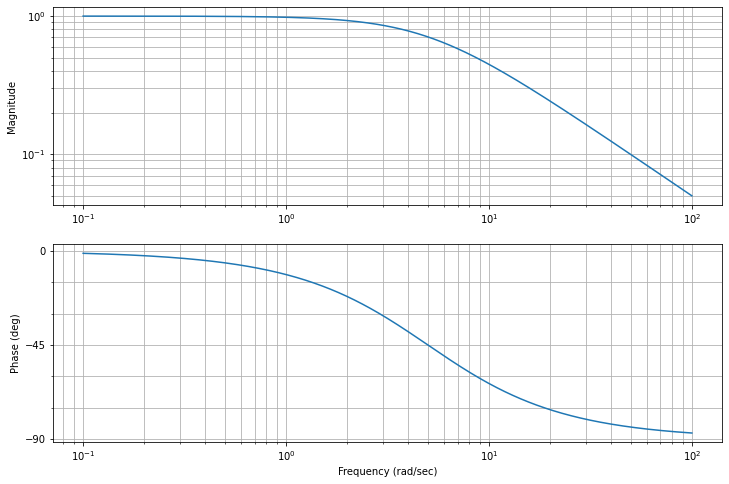

In [20]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_L, Hz=False)

### HIGH PASS FILTER 20rad/s

In [21]:
num = [1,0]
den = [1, 20]
sys_H = control.tf(num, den)
sys_H

TransferFunction(array([1, 0]), array([ 1, 20]))

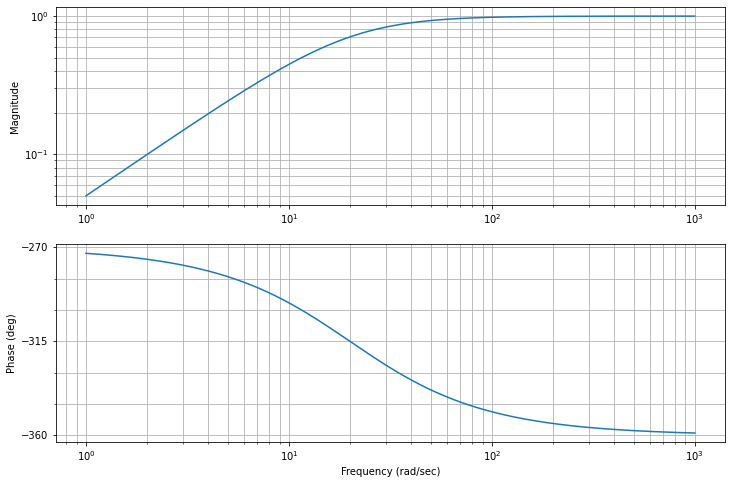

In [22]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_H, Hz=False)

### PASS FILTER

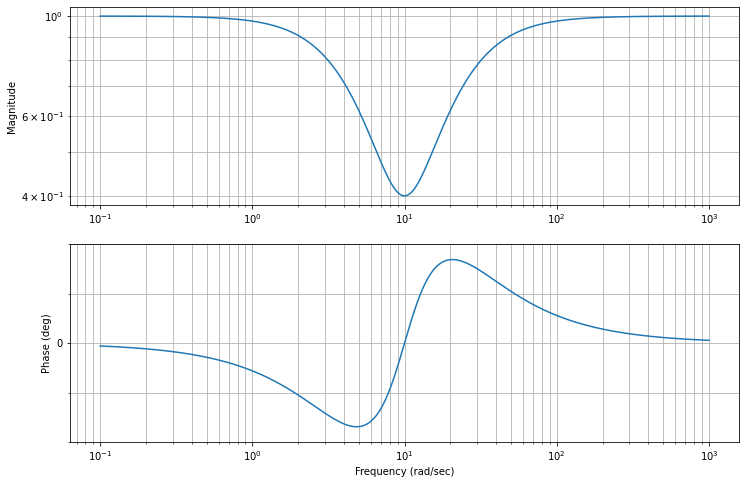

In [23]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_L+sys_H, Hz=False)

### WE LOWER DAMPNING ZETA = 0.1

In [24]:
wn =10
zeta = 0.1
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(num, den)
sys

TransferFunction(array([100]), array([  1.,   2., 100.]))

/home/markus/.local/lib/python3.8/site-packages/control/pzmap.py:85: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in pzmap; use 'plot'",


array([-1.+9.94987437j, -1.-9.94987437j])

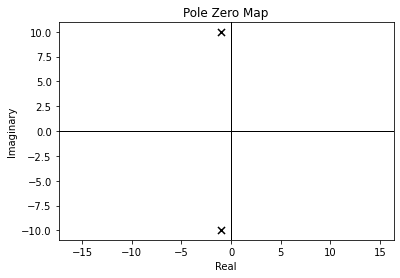

In [25]:
poles, zeros = control.pzmap(sys, Plot=True)
poles

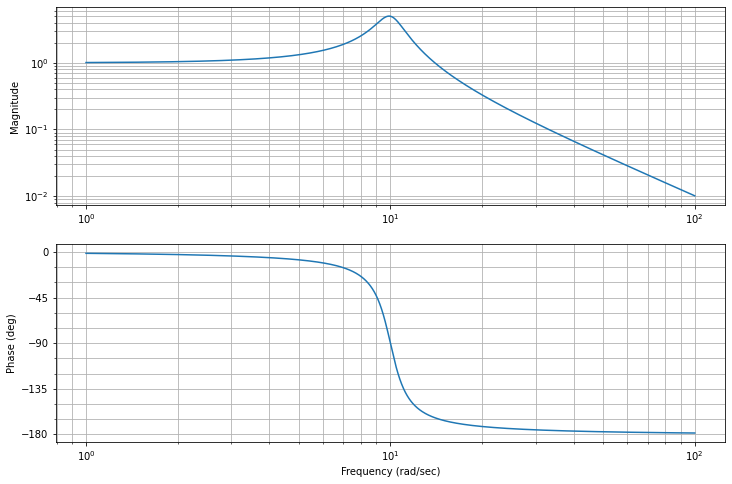

In [26]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys, Hz=False)

### WE REMOVE DAMPNING ZETA = 0

In [27]:
wn =10
zeta = 0
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(num, den)
sys

TransferFunction(array([100]), array([  1,   0, 100]))

/home/markus/.local/lib/python3.8/site-packages/control/pzmap.py:85: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in pzmap; use 'plot'",


array([-0.+10.j,  0.-10.j])

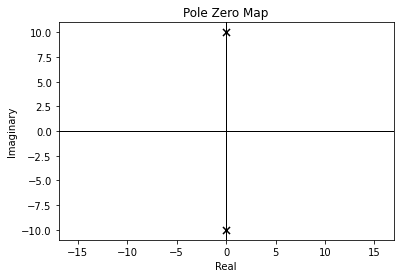

In [28]:
poles, zeros = control.pzmap(sys, Plot=True)
poles

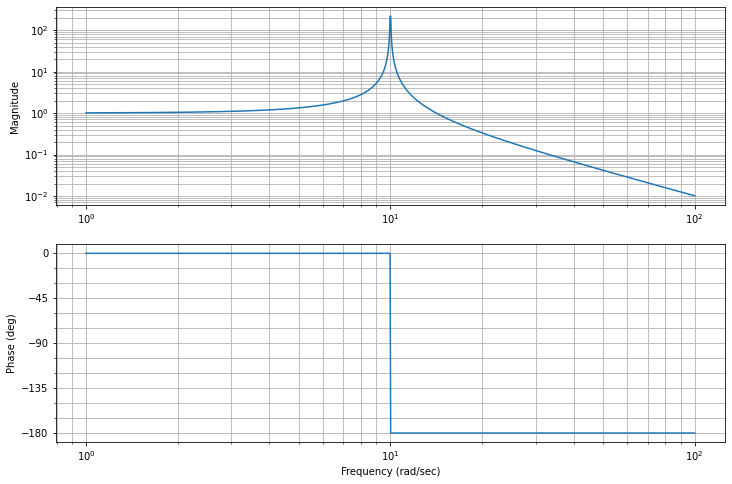

In [29]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys, Hz=False)

### Is is a notch filter but flipped. Extremly high gain in natural frequency which normaly we wouudl like to avoid

In [30]:
wn =10
zeta = 0.0000000001
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(den, num)
sys

TransferFunction(array([1.e+00, 2.e-09, 1.e+02]), array([100]))

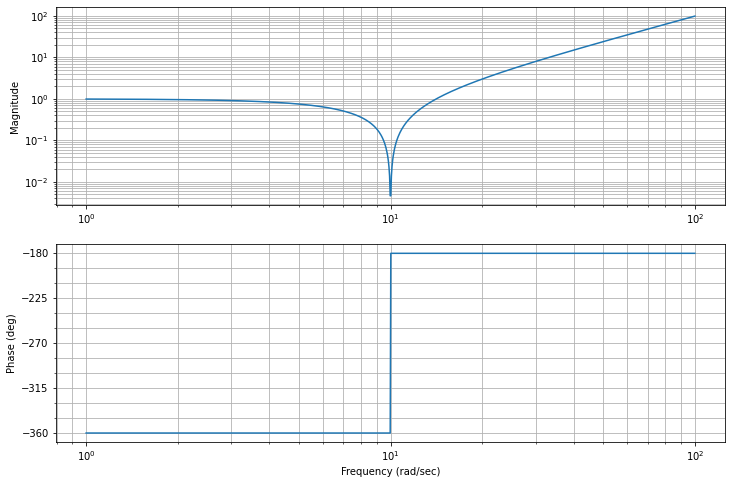

In [31]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys, Hz=False)#, dB = True)

### it is almos t perfect with thoios tranfer function but we have two problems: 1. high-freequency signals
### which are amplified by 40dB/decade since we have only two  zeros (unanswared) and
### 2. the transfer function can not be phisicaly realized because the numerator is greater then denominator
## WE FIX THESE TWO PROBLEMS BY ADDIND TWO POLES. Each pole will drag the high frequency magnintude down by 20dB/decade and flat
## our frequency response over netural frequency (crossover)

## HOW to choose poles?
## we use formula for pole which should be located below ond above natural frequency.
## pole_above = (a * wn)/(s+a* wn)
## pole_lower = (a * wn)/(s+(wn /a)) 

In [32]:
wn =10
zeta = 0.05
a = 2 # pole a time lower and higher than natural frequency
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(den, num)

num_pole_above = [a*wn]
den_pole_above = [1, a*wn]
pole_above = control.tf(num_pole_above, den_pole_above)

num_pole_below = [wn/a]
den_pole_below = [1, wn/a]
pole_below = control.tf(num_pole_below, den_pole_below)

notch = sys * pole_above * pole_below 

print(sys)
print(sys * pole_above)
print(sys * pole_above * pole_below)
#print(pole_above)
#print(pole_below)
print(notch)


s^2 + s + 100
-------------
     100


20 s^2 + 20 s + 2000
--------------------
    100 s + 2000


100 s^2 + 100 s + 1e+04
------------------------
100 s^2 + 2500 s + 1e+04


100 s^2 + 100 s + 1e+04
------------------------
100 s^2 + 2500 s + 1e+04



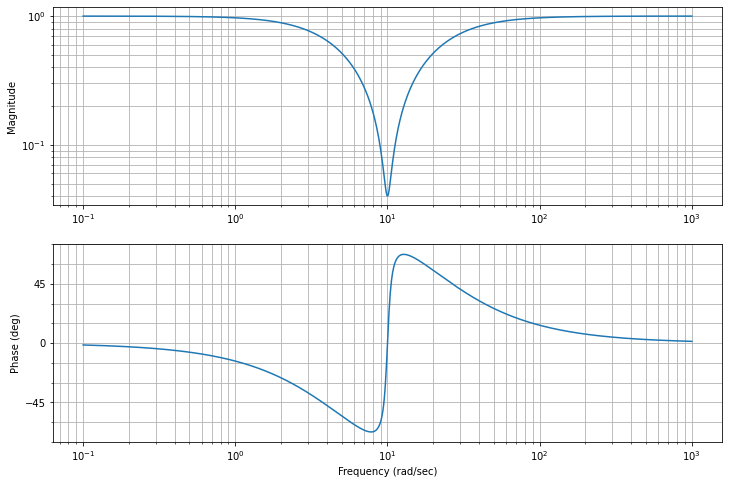

In [33]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(notch, Hz=False)

In [34]:
################################
################################
################################

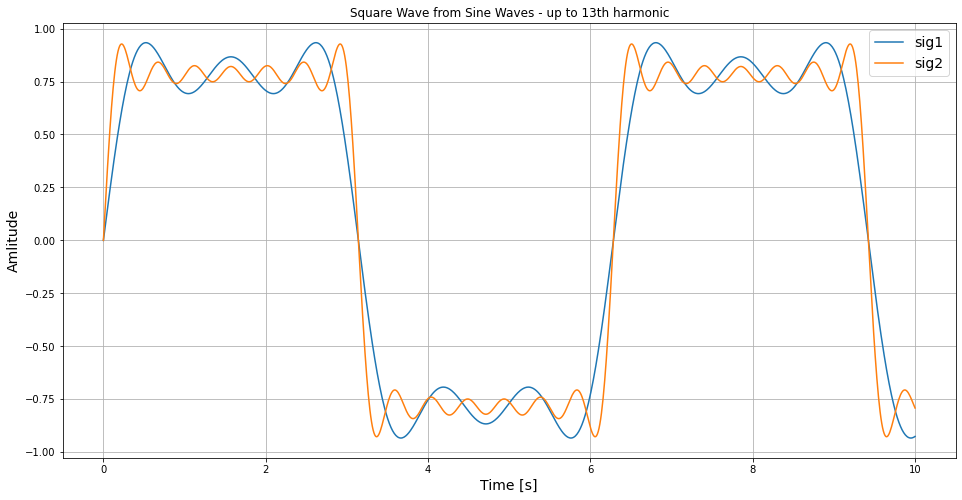

In [49]:
t = np.linspace(0,10,1000)
plt.figure(figsize=(16,8))
plt.grid()
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Amlitude', fontsize=14)


sig1 = np.sin(t) + np.sin(3*t)/3 + np.sin(5*t)/5 #+ np.sin(7*t)/7 + np.sin(9*t)/9 + np.sin(11*t)/11 + np.sin(13*t)/13
sig2 = np.sin(t) + np.sin(3*t)/3 + np.sin(5*t)/5 + np.sin(7*t)/7 + np.sin(9*t)/9 + np.sin(11*t)/11 + np.sin(13*t)/13
plt.plot(t, sig1, t, sig2 )
plt.title('Square Wave from Sine Waves - up to 13th harmonic')
plt.legend(['sig1','sig2'], fontsize=14)

#plt.legend(['sin(t)','0.5sin(3t)', 'sin(t) + 0.5sin(3t)' ], loc='upper right', fontsize=14)

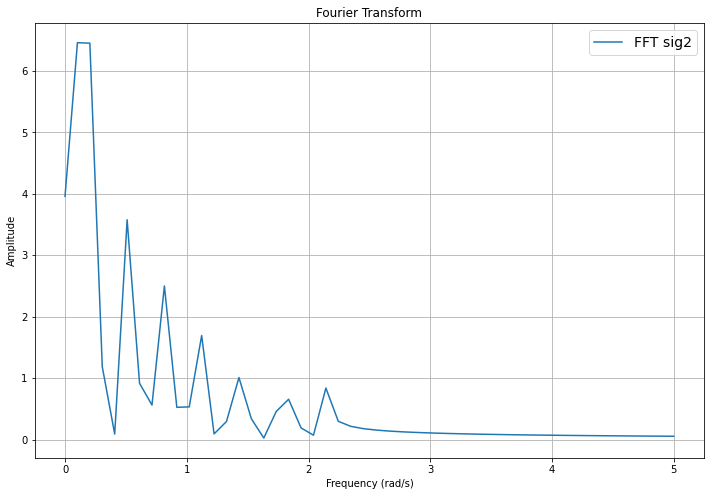

In [50]:
from scipy.fftpack import fft
import control.matlab
plt.figure(figsize=(12,8))
N =  100 #100
T = 1.0 / 0.1

yf = fft(sig2)
xf = np.linspace(0.0, 100.0/(2.0*T), N//2)



plt.title('Fourier Transform')

yfourier = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yfourier)
plt.grid()
plt.xlabel(r'Frequency (rad/s)')
plt.ylabel(r'Amplitude')
plt.legend(['FFT sig2'], fontsize=14)
plt.show()

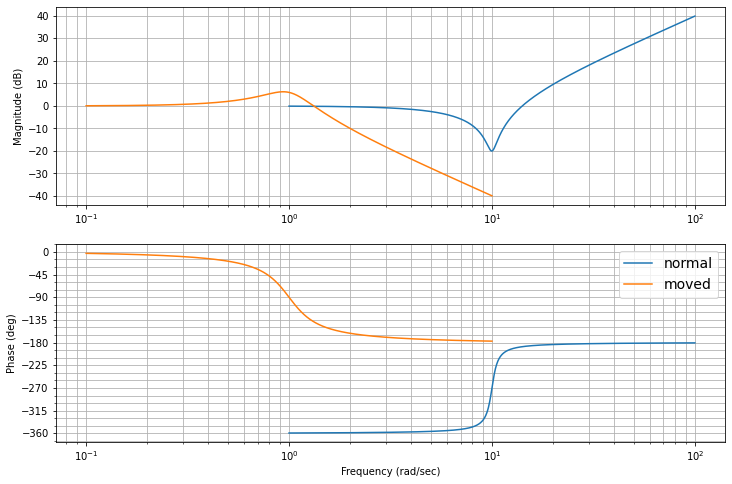

In [52]:
plt.figure(figsize=(12,8))
num_m = [1]
den_m = [1, 0.5, 1]
sys_m = control.tf(num_m, den_m)
mag, phase, omega = control.bode_plot(sys, Hz=False)
mag, phase, omega = control.bode_plot(sys_m, Hz=False)
plt.legend(['normal', 'moved'], loc='upper right', fontsize=14)

/home/markus/.local/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


Text(0.5, 1.0, 'Square sig(sum up to 13th harmonic through design before Notch filter)')

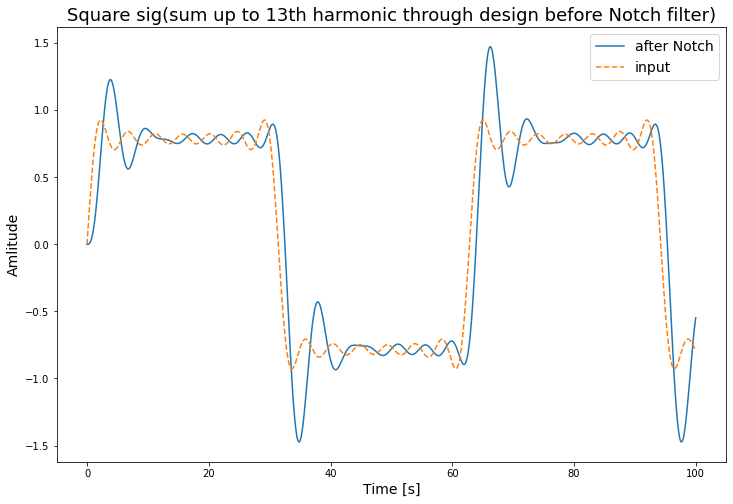

In [55]:
T = np.linspace(0,100,1000)

U = sig2


yout,t, _ = control.matlab.lsim(sys_m, U, T)

# Plot
plt.figure(figsize=(12,8))

plt.plot(t,yout)
plt.plot(t,U, linestyle='--') # We'll use `step` to create a staircase plot for the control actions
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Amlitude', fontsize=14)
plt.legend(['after Notch', 'input'], loc='upper right', fontsize=14)
plt.title('Square sig(sum up to 13th harmonic through design before Notch filter)', fontsize=18)

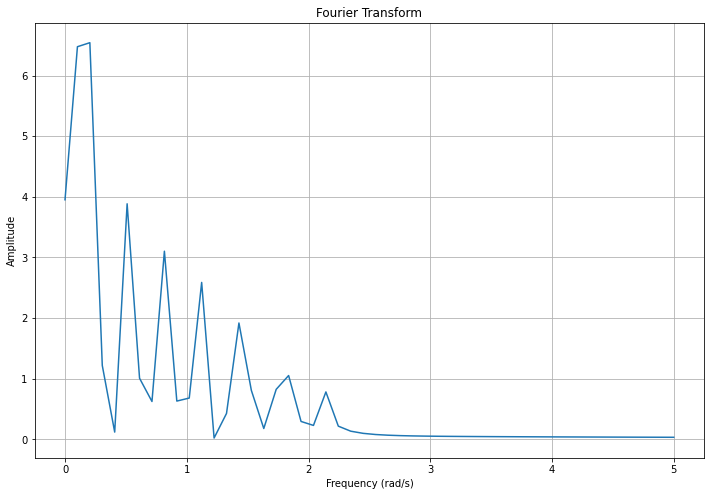

In [56]:
plt.figure(figsize=(12,8))
N =  100 #100
T = 1.0 / 0.1

yf = fft(yout)
xf = np.linspace(0.0, 100.0/(2.0*T), N//2)



plt.title('Fourier Transform')
yfourier = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yfourier)
plt.grid()
plt.xlabel(r'Frequency (rad/s)')
plt.ylabel(r'Amplitude')
plt.show()

## SIG THROUGHT NOTCH

In [57]:
wn =10
zeta = 0.05
a = 2 # pole a time lower and higher than natural frequency
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(den, num)

num_pole_above = [a*wn]
den_pole_above = [1, a*wn]
pole_above = control.tf(num_pole_above, den_pole_above)

num_pole_below = [wn/a]
den_pole_below = [1, wn/a]
pole_below = control.tf(num_pole_below, den_pole_below)

notch = sys * pole_above * pole_below 

print(sys)
print(sys * pole_above)
print(sys * pole_above * pole_below)
#print(pole_above)
#print(pole_below)
print(notch)


s^2 + s + 100
-------------
     100


20 s^2 + 20 s + 2000
--------------------
    100 s + 2000


100 s^2 + 100 s + 1e+04
------------------------
100 s^2 + 2500 s + 1e+04


100 s^2 + 100 s + 1e+04
------------------------
100 s^2 + 2500 s + 1e+04



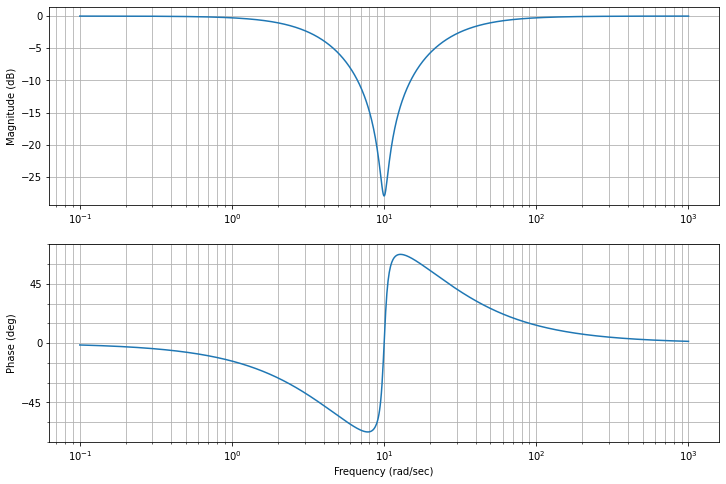

In [58]:
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(notch, Hz=False)

In [59]:
t = np.linspace(0,1*np.pi,1000)

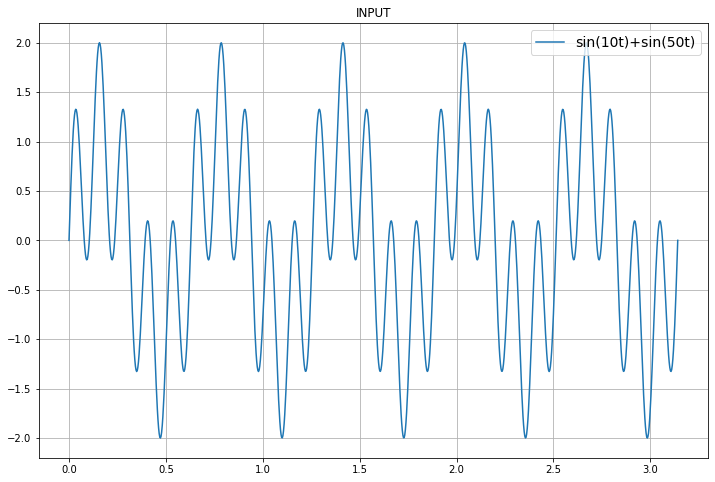

In [60]:
plt.figure(figsize=(12,8))
plt.grid()
sig3 = np.sin(10*t) + np.sin(50*t)
plt.plot(t, sig3 )
plt.title('INPUT')
plt.legend(['sin(10t)+sin(50t)' ], loc='upper right', fontsize=14)

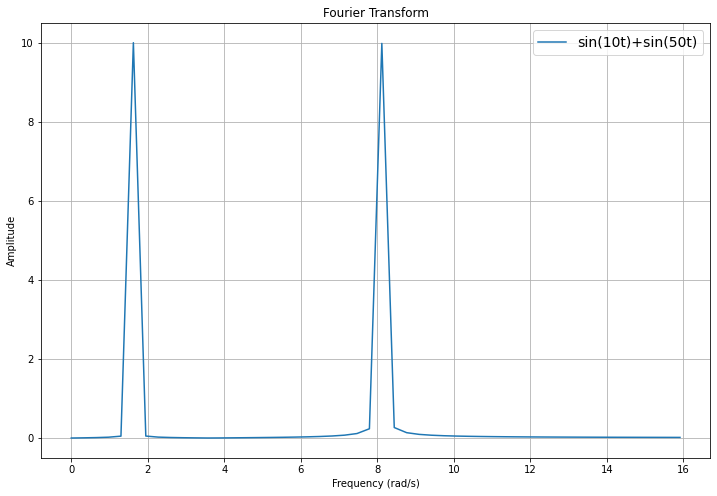

In [61]:
plt.figure(figsize=(12,8))
N =  100 #100
T = np.pi / 1.0

yf = fft(sig3)
xf = np.linspace(0.0, 100.0/(2.0*T), N//2)



plt.title('Fourier Transform')
yfourier = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yfourier)
plt.grid()
plt.xlabel(r'Frequency (rad/s)')
plt.ylabel(r'Amplitude')
plt.legend(['sin(10t)+sin(50t)' ], loc='upper right', fontsize=14)
plt.show()

/home/markus/.local/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


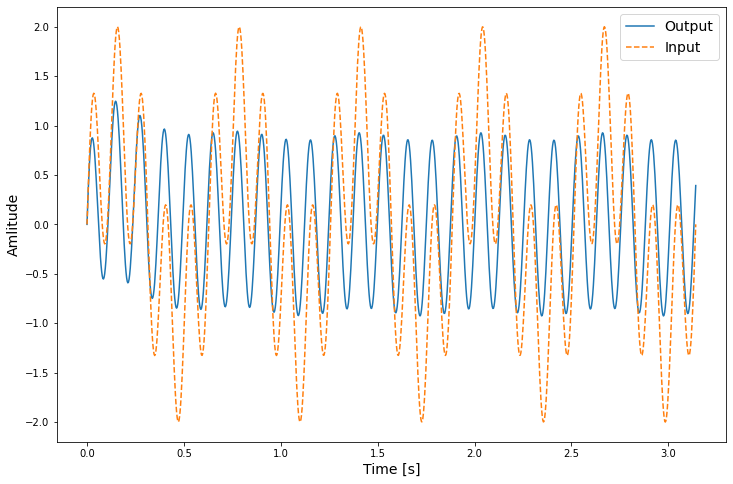

In [62]:
T = np.linspace(0,2,1000)
T= np.linspace(0,1*np.pi,1000)

U = np.sin(10*T) + np.sin (50*T)



yout,t, _ = control.matlab.lsim(notch, U, T)

# Plot
plt.figure(figsize=(12,8))

plt.plot(t,yout)
plt.plot(t,U, linestyle='--') # We'll use `step` to create a staircase plot for the control actions
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Amlitude', fontsize=14)
plt.legend(['Output', 'Input'], loc='upper right', fontsize=14)

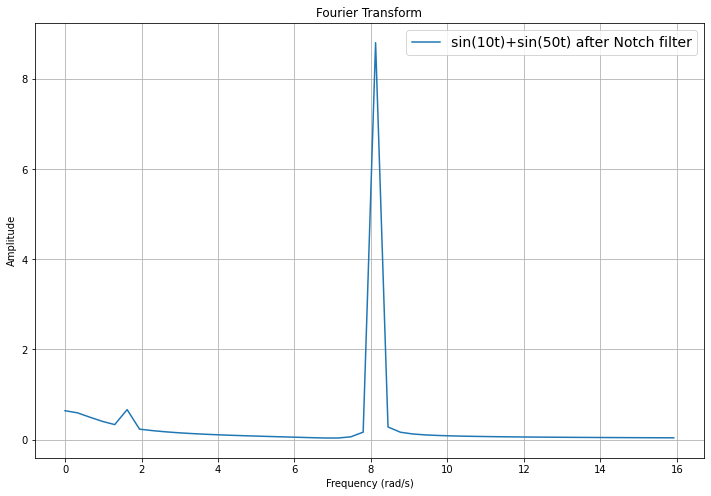

In [63]:
plt.figure(figsize=(12,8))
N =  100 #100
T = np.pi / 1.0

yf = fft(yout)
xf = np.linspace(0.0, 100.0/(2.0*T), N//2)



plt.title('Fourier Transform')
yfourier = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yfourier)
plt.grid()
plt.xlabel(r'Frequency (rad/s)')
plt.ylabel(r'Amplitude')
plt.legend(['sin(10t)+sin(50t) after Notch filter' ], loc='upper right', fontsize=14)
plt.show()